In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, BertConfig, get_linear_schedule_with_warmup
import matplotlib as plt
import torch
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler, TensorDataset
from sklearn.metrics import *
from sklearn.metrics import matthews_corrcoef
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense

In [ ]:
import pickle
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
audio_features = pd.read_pickle("/content/drive/MyDrive/Multimodal Emotion Tracking/IEMOCAP ICON Features/audio/IEMOCAP_audio_features.pickle")

In [ ]:
video_features = pd.read_pickle("/content/drive/MyDrive/Multimodal Emotion Tracking/IEMOCAP ICON Features/video/IEMOCAP_video_features.pickle")

In [ ]:
trainId = pd.read_pickle("/content/drive/MyDrive/Multimodal Emotion Tracking/IEMOCAP ICON Features/trainID.pkl")

In [ ]:
testId = pd.read_pickle("/content/drive/MyDrive/Multimodal Emotion Tracking/IEMOCAP ICON Features/testID.pkl")

In [ ]:
dataset = pd.read_pickle("/content/drive/MyDrive/Multimodal Emotion Tracking/IEMOCAP ICON Features/dataset.pkl")

In [ ]:
X_train = []
y_train = []
for i in trainId:
  X_train.append(audio_features[i])
  y_train.append(dataset[1][i])

print(len(X_train), len(y_train))

5810 5810


In [ ]:
X_test = []
y_test = []
for i in testId:
  X_test.append(audio_features[i])
  y_test.append(dataset[1][i])

print(len(X_test), len(y_test))

1623 1623


In [ ]:
X = np.concatenate((X_train, X_test), axis=0)

In [ ]:
y = np.concatenate((y_train, y_test), axis=0)

In [ ]:
from sklearn.model_selection import train_test_split

# Veriyi %80 eğitim ve %20 doğrulama/test olarak ayır
x_train_full, x_temp, y_train_full, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Eğitim setini %87.5 eğitim ve %12.5 doğrulama olarak ayır
x_train_audio, x_val_audio, y_train_audio, y_val_audio = train_test_split(x_train_full, y_train_full, test_size=0.125, random_state=42)

# Test setini ayır
x_test_audio, y_test_audio = x_temp, y_temp

# Veri setlerinin boyutlarını kontrol et
print(f'Train set size: {len(x_train_audio)}')
print(f'Validation set size: {len(x_val_audio)}')
print(f'Test set size: {len(x_test_audio)}')

Train set size: 5194
Validation set size: 743
Test set size: 1485


In [ ]:
X_train = []
y_train = []
for i in trainId:
  X_train.append(video_features[i])
  y_train.append(dataset[1][i])

print(len(X_train), len(y_train))

5810 5810


In [ ]:
X_test = []
y_test = []
for i in testId:
  X_test.append(video_features[i])
  y_test.append(dataset[1][i])

print(len(X_test), len(y_test))

1623 1623


In [ ]:
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

In [ ]:
from sklearn.model_selection import train_test_split

# Veriyi %80 eğitim ve %20 doğrulama/test olarak ayır
x_train_full, x_temp, y_train_full, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Eğitim setini %87.5 eğitim ve %12.5 doğrulama olarak ayır
x_train_video, x_val_video, y_train_video, y_val_video = train_test_split(x_train_full, y_train_full, test_size=0.125, random_state=42)

# Test setini ayır
x_test_video, y_test_video = x_temp, y_temp

# Veri setlerinin boyutlarını kontrol et
print(f'Train set size: {len(x_train_video)}')
print(f'Validation set size: {len(x_val_video)}')
print(f'Test set size: {len(x_test_video)}')

Train set size: 5194
Validation set size: 743
Test set size: 1485


In [ ]:
# Encoding target variable
encoder = LabelEncoder()
y_train_video = encoder.fit_transform(y_train_video)
y_test_video = encoder.fit_transform(y_test_video)
y_val_video = encoder.fit_transform(y_val_video)

In [ ]:
encoder.classes_

array(['ang', 'exc', 'fru', 'hap', 'neu', 'sad'], dtype='<U3')

In [ ]:
y_train_audio = encoder.fit_transform(y_train_audio)
y_test_audio = encoder.fit_transform(y_test_audio)
y_val_audio = encoder.fit_transform(y_val_audio)

In [ ]:
with open('/content/drive/MyDrive/Multimodal Emotion Tracking/Text Features/SEMEVAL-BERT/IEMOCAP_bert_train.pkl', 'rb') as f:
    train_data_text = pickle.load(f)

In [ ]:
with open('/content/drive/MyDrive/Multimodal Emotion Tracking/Text Features/SEMEVAL-BERT/IEMOCAP_bert_test.pkl', 'rb') as f:
    test_data_text = pickle.load(f)

In [ ]:
with open('/content/drive/MyDrive/Multimodal Emotion Tracking/Text Features/SEMEVAL-BERT/IEMOCAP_bert_val.pkl', 'rb') as f:
    val_data_text = pickle.load(f)

In [ ]:
train_emb = torch.tensor(train_data_text['features'])
train_mask = torch.tensor(train_data_text['masks'])
train_label = torch.tensor(train_data_text['labels'])

In [ ]:
test_emb = torch.tensor(test_data_text['features'])
test_mask = torch.tensor(test_data_text['masks'])
test_label = torch.tensor(test_data_text['labels'])

In [ ]:
val_emb = torch.tensor(val_data_text['features'])
val_mask = torch.tensor(val_data_text['masks'])
val_label = torch.tensor(val_data_text['labels'])

In [ ]:
x_train_text = train_data_text['features'].numpy()
x_test_text = test_data_text['features'].numpy()
x_val_text = val_data_text['features'].numpy()

In [ ]:
combined_features_train = np.concatenate([x_train_text, x_train_audio, x_train_video], axis=1)
combined_features_val = np.concatenate([x_val_text, x_val_audio, x_val_video], axis=1)
combined_features_test = np.concatenate([x_test_text, x_test_audio, x_test_video], axis=1)

In [ ]:
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=6,
    max_depth=5,
    learning_rate=0.1,
    n_estimators=100,
    random_state=37
)

In [ ]:
xgb_model.fit(combined_features_train, y_dropped_video)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, num_class=6,
              num_parallel_tree=None, ...)

In [ ]:
predictions = xgb_model.predict(combined_features_test)

In [ ]:
predictions = xgb_model.predict(combined_features_test_set)

In [ ]:
predictions

array([0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 5], dtype=int32)

In [ ]:
[0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 5]

In [ ]:
y_test_set_video

array([2, 0, 4, 4, 2, 4, 0, 2, 0, 2, 2])

In [ ]:
test_classes

['fru', 'ang', 'neu', 'neu', 'fru', 'neu', 'ang', 'fru', 'ang', 'fru', 'fru']

In [ ]:
classes = encoder.classes_

In [ ]:
encoder.fit_transform(y_test_set_video)

array([1, 0, 2, 2, 1, 2, 0, 1, 0, 1, 1])

In [ ]:
print(classification_report(y_test_audio, predictions))

              precision    recall  f1-score   support

           0       0.58      0.50      0.54       228
           1       0.61      0.55      0.58       200
           2       0.51      0.56      0.54       388
           3       0.46      0.30      0.37       112
           4       0.52      0.58      0.55       359
           5       0.65      0.70      0.67       198

    accuracy                           0.55      1485
   macro avg       0.56      0.53      0.54      1485
weighted avg       0.55      0.55      0.55      1485



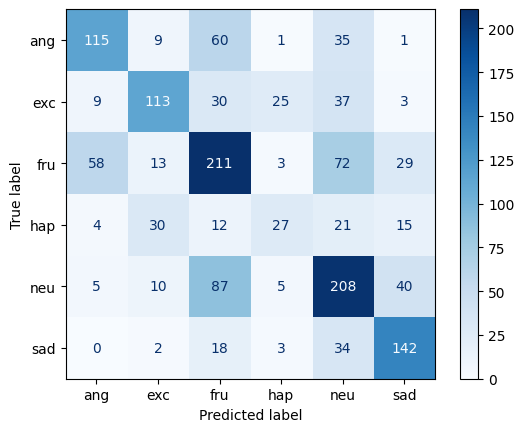

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test_audio, predictions)
etiketler = ['hap', 'fru', 'neu', 'ang', 'sad', 'exc']
# Karışıklık matrisini görselleştirin
labels = encoder.inverse_transform(np.arange(len(etiketler)))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
import joblib
joblib.dump(xgb_model, 'xgb_model.pkl')


['xgb_model.pkl']

In [ ]:

# Load the model from the file
loaded_model = joblib.load('xgb_model.pkl')


In [ ]:
p = loaded_model.predict(combined_features_test)

In [ ]:
p

array([0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 5], dtype=int32)

In [ ]:
predict_classes

['ang', 'ang', 'fru', 'neu', 'fru', 'neu', 'ang', 'fru', 'ang', 'fru', 'sad']